In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gnninterpreter import *

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch

# Mutag

In [4]:
dataset = MUTAGDataset(seed=100)

In [5]:
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=3)

In [6]:
model.load_state_dict(torch.load('ckpts/mutag.pt'))

<All keys matched successfully>

In [7]:
dataset.evaluate_model(model)

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


class idx: 0, class: nonmutagen, f1: 0.8799999952316284
class idx: 1, class: mutagen, f1: 0.9402390718460083


{'nonmutagen': 0.8799999952316284, 'mutagen': 0.9402390718460083}

In [8]:
mean_embeds = dataset.mean_embeddings(model)

In [9]:
trainer = {}
sampler = {}

# Mutagen

In [10]:
cls_idx = 1
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=1),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=1),
        dict(key="omega", criterion=NormPenalty(order=2), weight=1),
        dict(key="xi", criterion=NormPenalty(order=1), weight=0),
        dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=0),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)

In [11]:
trainer[1].train(2000)

  0%|          | 0/2000 [00:00<?, ?it/s]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 1/2000 [00:02<1:36:09,  2.89s/it, size=90.8, bpw=1.1, nonmutagen=-2.31, mutagen=2.29]

iteration=0, loss=364.30, size=90.78572082519531, scores={'nonmutagen': -2.308521032333374, 'mutagen': 2.2900924682617188}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  0%|          | 2/2000 [00:04<1:16:05,  2.29s/it, size=86.3, bpw=1.21, nonmutagen=-20.8, mutagen=20.8]

iteration=1, loss=230.89, size=86.32315063476562, scores={'nonmutagen': -20.829130172729492, 'mutagen': 20.768779754638672}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 3/2000 [00:06<1:10:35,  2.12s/it, size=80.3, bpw=1.33, nonmutagen=-32.8, mutagen=32.7]

iteration=2, loss=184.39, size=80.33172607421875, scores={'nonmutagen': -32.818626403808594, 'mutagen': 32.72439956665039}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  0%|          | 4/2000 [00:08<1:02:48,  1.89s/it, size=84, bpw=1.46, nonmutagen=-52.4, mutagen=52.2]  

iteration=3, loss=132.50, size=83.9914779663086, scores={'nonmutagen': -52.35585021972656, 'mutagen': 52.2064323425293}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 5/2000 [00:09<57:46,  1.74s/it, size=80.2, bpw=1.61, nonmutagen=-82.4, mutagen=82.2]  

iteration=4, loss=155.04, size=80.23506164550781, scores={'nonmutagen': -82.39955139160156, 'mutagen': 82.16525268554688}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  0%|          | 6/2000 [00:11<54:12,  1.63s/it, size=74.6, bpw=1.77, nonmutagen=-90.8, mutagen=90.5]

iteration=5, loss=128.47, size=74.58004760742188, scores={'nonmutagen': -90.76962280273438, 'mutagen': 90.51167297363281}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 7/2000 [00:12<52:10,  1.57s/it, size=80.6, bpw=1.95, nonmutagen=-135, mutagen=134]  

iteration=6, loss=76.73, size=80.63238525390625, scores={'nonmutagen': -134.7620086669922, 'mutagen': 134.37979125976562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  0%|          | 8/2000 [00:13<50:15,  1.51s/it, size=77.8, bpw=2.14, nonmutagen=-117, mutagen=117]

iteration=7, loss=96.22, size=77.80075073242188, scores={'nonmutagen': -117.19888305664062, 'mutagen': 116.86627197265625}


  0%|          | 8/2000 [00:15<50:15,  1.51s/it, size=68.6, bpw=2.36, nonmutagen=-152, mutagen=151]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 9/2000 [00:15<48:27,  1.46s/it, size=68.6, bpw=2.36, nonmutagen=-152, mutagen=151]

iteration=8, loss=106.45, size=68.62008666992188, scores={'nonmutagen': -151.91864013671875, 'mutagen': 151.4879608154297}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  0%|          | 10/2000 [00:16<50:08,  1.51s/it, size=69.9, bpw=2.59, nonmutagen=-165, mutagen=164]

iteration=9, loss=124.08, size=69.89752960205078, scores={'nonmutagen': -164.84237670898438, 'mutagen': 164.3751678466797}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 11/2000 [00:18<48:36,  1.47s/it, size=74.6, bpw=2.85, nonmutagen=-142, mutagen=142]

iteration=10, loss=119.96, size=74.5627212524414, scores={'nonmutagen': -142.0191650390625, 'mutagen': 141.61643981933594}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 12/2000 [00:19<48:15,  1.46s/it, size=68.1, bpw=3.14, nonmutagen=-159, mutagen=158]

iteration=11, loss=134.10, size=68.12088012695312, scores={'nonmutagen': -158.62559509277344, 'mutagen': 158.1759490966797}


  1%|          | 12/2000 [00:21<48:15,  1.46s/it, size=68.9, bpw=3.45, nonmutagen=-152, mutagen=152]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 13/2000 [00:21<46:38,  1.41s/it, size=68.9, bpw=3.45, nonmutagen=-152, mutagen=152]

iteration=12, loss=146.70, size=68.94970703125, scores={'nonmutagen': -152.01986694335938, 'mutagen': 151.58889770507812}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 14/2000 [00:22<47:01,  1.42s/it, size=65.1, bpw=3.8, nonmutagen=-155, mutagen=155] 

iteration=13, loss=180.42, size=65.10015106201172, scores={'nonmutagen': -155.35830688476562, 'mutagen': 154.91790771484375}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 15/2000 [00:23<48:03,  1.45s/it, size=63.8, bpw=4.18, nonmutagen=-150, mutagen=150]

iteration=14, loss=176.72, size=63.822715759277344, scores={'nonmutagen': -150.42677307128906, 'mutagen': 150.0002899169922}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 16/2000 [00:25<48:13,  1.46s/it, size=63.9, bpw=4.59, nonmutagen=-152, mutagen=152]

iteration=15, loss=180.87, size=63.875732421875, scores={'nonmutagen': -152.11268615722656, 'mutagen': 151.6814422607422}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 17/2000 [00:26<48:00,  1.45s/it, size=58.7, bpw=5.05, nonmutagen=-163, mutagen=162]

iteration=16, loss=193.52, size=58.69636917114258, scores={'nonmutagen': -162.72113037109375, 'mutagen': 162.25991821289062}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 18/2000 [00:28<47:11,  1.43s/it, size=52.8, bpw=5.56, nonmutagen=-152, mutagen=152]

iteration=17, loss=179.91, size=52.84638214111328, scores={'nonmutagen': -152.25181579589844, 'mutagen': 151.82017517089844}


  1%|          | 19/2000 [00:29<46:17,  1.40s/it, size=48.8, bpw=6.12, nonmutagen=-161, mutagen=160]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>
iteration=18, loss=200.10, size=48.84994125366211, scores={'nonmutagen': -160.57626342773438, 'mutagen': 160.12112426757812}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 20/2000 [00:31<47:12,  1.43s/it, size=40.5, bpw=6.73, nonmutagen=-170, mutagen=170]

iteration=19, loss=219.57, size=40.50402069091797, scores={'nonmutagen': -170.1348876953125, 'mutagen': 169.65274047851562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 21/2000 [00:32<48:36,  1.47s/it, size=37.7, bpw=7.4, nonmutagen=-138, mutagen=138] 

iteration=20, loss=214.16, size=37.738739013671875, scores={'nonmutagen': -138.3115692138672, 'mutagen': 137.9193115234375}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>


  1%|          | 22/2000 [00:34<47:48,  1.45s/it, size=33.8, bpw=8.14, nonmutagen=-150, mutagen=150]

iteration=21, loss=229.75, size=33.806182861328125, scores={'nonmutagen': -150.36273193359375, 'mutagen': 149.93643188476562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 23/2000 [00:35<49:00,  1.49s/it, size=29.6, bpw=8.95, nonmutagen=-163, mutagen=163]

iteration=22, loss=221.80, size=29.609163284301758, scores={'nonmutagen': -163.03884887695312, 'mutagen': 162.5767364501953}


  1%|          | 23/2000 [00:36<52:52,  1.60s/it, size=29.6, bpw=8.95, nonmutagen=-163, mutagen=163]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e94727a0>
Expected number of edges of sample: 29.609163284301758; Budget: 30
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=6 m=3
logits=[-128.67247009277344, 128.30746459960938]
probs=[0.0, 1.0]


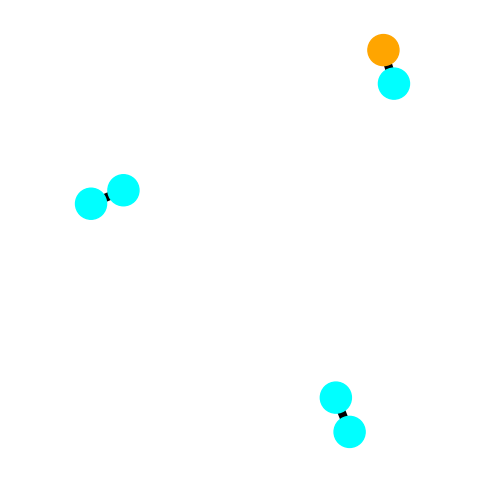

In [12]:
G = trainer[1].evaluate(threshold=0.5, show=True)

In [14]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])

print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{2: {6: {'label': 1}}, 6: {2: {'label': 1}}, 4: {18: {'label': 2}}, 18: {4: {'label': 2}}, 8: {15: {'label': 1}}, 15: {8: {'label': 1}}}
[2, 6, 4, 18, 8, 15]
[(2, 6), (4, 18), (8, 15)]
Nodes: 
{'label': 4}
{'label': 0}
{'label': 4}
{'label': 4}
{'label': 4}
{'label': 4}
Edges: 
{'label': 1}
{'label': 2}
{'label': 1}


# Non-Mutagen

In [15]:
cls_idx = 0
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=1),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=1),
        dict(key="omega", criterion=NormPenalty(order=2), weight=1),
        dict(key="xi", criterion=NormPenalty(order=1), weight=0),
        dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=0),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)

In [16]:
trainer[0].train(2000)

  0%|          | 1/2000 [00:02<1:32:52,  2.79s/it, size=85.6, bpw=0.95, nonmutagen=-8.45, mutagen=8.42]

iteration=0, loss=372.01, size=85.62525177001953, scores={'nonmutagen': -8.448118209838867, 'mutagen': 8.42274284362793}


  0%|          | 2/2000 [00:04<1:10:00,  2.10s/it, size=80.3, bpw=0.902, nonmutagen=-3.13, mutagen=3.09]

iteration=1, loss=236.76, size=80.3273696899414, scores={'nonmutagen': -3.130263566970825, 'mutagen': 3.0903449058532715}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 3/2000 [00:05<59:57,  1.80s/it, size=90.4, bpw=0.993, nonmutagen=1.49, mutagen=-1.49]  

iteration=2, loss=183.72, size=90.3510513305664, scores={'nonmutagen': 1.4925965070724487, 'mutagen': -1.4935667514801025}


  0%|          | 4/2000 [00:07<54:44,  1.65s/it, size=86.6, bpw=0.943, nonmutagen=-1.93, mutagen=1.93]

iteration=3, loss=202.13, size=86.61408996582031, scores={'nonmutagen': -1.9347593784332275, 'mutagen': 1.9277851581573486}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 5/2000 [00:08<52:02,  1.57s/it, size=82.8, bpw=1.04, nonmutagen=19.5, mutagen=-21.9] 

iteration=4, loss=191.96, size=82.75816345214844, scores={'nonmutagen': 19.521211624145508, 'mutagen': -21.86780548095703}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  0%|          | 6/2000 [00:10<51:33,  1.55s/it, size=89, bpw=1.14, nonmutagen=19.9, mutagen=-21.5]  

iteration=5, loss=173.05, size=88.9756851196289, scores={'nonmutagen': 19.8707218170166, 'mutagen': -21.544580459594727}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 7/2000 [00:11<53:45,  1.62s/it, size=86, bpw=1.26, nonmutagen=14.5, mutagen=-18.6]

iteration=6, loss=191.23, size=86.01301574707031, scores={'nonmutagen': 14.534823417663574, 'mutagen': -18.638456344604492}


  0%|          | 8/2000 [00:13<55:38,  1.68s/it, size=81.1, bpw=1.38, nonmutagen=7.24, mutagen=-11.7]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>
iteration=7, loss=215.44, size=81.07109069824219, scores={'nonmutagen': 7.235774040222168, 'mutagen': -11.732112884521484}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  0%|          | 9/2000 [00:15<54:25,  1.64s/it, size=83, bpw=1.52, nonmutagen=5.3, mutagen=-6.66]   

iteration=8, loss=180.29, size=83.04805755615234, scores={'nonmutagen': 5.302541732788086, 'mutagen': -6.66315221786499}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  0%|          | 10/2000 [00:16<52:23,  1.58s/it, size=82.7, bpw=1.67, nonmutagen=10.5, mutagen=-11.1]

iteration=9, loss=197.67, size=82.67317962646484, scores={'nonmutagen': 10.49771499633789, 'mutagen': -11.106746673583984}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 11/2000 [00:18<51:44,  1.56s/it, size=82.7, bpw=1.84, nonmutagen=18.9, mutagen=-20.5]

iteration=10, loss=203.34, size=82.73391723632812, scores={'nonmutagen': 18.940914154052734, 'mutagen': -20.538347244262695}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|          | 12/2000 [00:19<53:05,  1.60s/it, size=74.9, bpw=2.02, nonmutagen=2.02, mutagen=-2.02]

iteration=11, loss=246.29, size=74.91639709472656, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 13/2000 [00:21<53:50,  1.63s/it, size=77.1, bpw=2.22, nonmutagen=10.9, mutagen=-11.7]

iteration=12, loss=239.33, size=77.126220703125, scores={'nonmutagen': 10.945929527282715, 'mutagen': -11.679195404052734}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|          | 14/2000 [00:23<53:52,  1.63s/it, size=74.6, bpw=2.45, nonmutagen=16.9, mutagen=-20.3]

iteration=13, loss=266.43, size=74.5833969116211, scores={'nonmutagen': 16.926969528198242, 'mutagen': -20.26599884033203}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 15/2000 [00:24<54:16,  1.64s/it, size=72.6, bpw=2.69, nonmutagen=1.6, mutagen=-1.6]  

iteration=14, loss=277.65, size=72.5796127319336, scores={'nonmutagen': 1.599176287651062, 'mutagen': -1.5988447666168213}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|          | 16/2000 [00:26<52:51,  1.60s/it, size=68.1, bpw=2.96, nonmutagen=5.27, mutagen=-6.52]

iteration=15, loss=270.69, size=68.07534790039062, scores={'nonmutagen': 5.271772384643555, 'mutagen': -6.517466068267822}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 17/2000 [00:28<54:06,  1.64s/it, size=64.6, bpw=3.26, nonmutagen=4.02, mutagen=-4.41]

iteration=16, loss=279.72, size=64.59867858886719, scores={'nonmutagen': 4.0216064453125, 'mutagen': -4.406715393066406}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|          | 18/2000 [00:29<52:18,  1.58s/it, size=72.9, bpw=3.58, nonmutagen=2.02, mutagen=-2.02]

iteration=17, loss=275.38, size=72.88075256347656, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}


  1%|          | 19/2000 [00:30<48:56,  1.48s/it, size=79.3, bpw=3.4, nonmutagen=-1.08, mutagen=1.07] 

iteration=18, loss=255.16, size=79.25798034667969, scores={'nonmutagen': -1.0772390365600586, 'mutagen': 1.0726873874664307}


  1%|          | 20/2000 [00:32<47:39,  1.44s/it, size=76.6, bpw=3.23, nonmutagen=0.196, mutagen=-.197]

iteration=19, loss=287.31, size=76.56580352783203, scores={'nonmutagen': 0.19637298583984375, 'mutagen': -0.19732654094696045}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 21/2000 [00:33<46:44,  1.42s/it, size=70.9, bpw=3.56, nonmutagen=2.18, mutagen=-2.74] 

iteration=20, loss=321.42, size=70.88762664794922, scores={'nonmutagen': 2.1848320960998535, 'mutagen': -2.7369980812072754}


  1%|          | 22/2000 [00:34<45:44,  1.39s/it, size=64.3, bpw=3.91, nonmutagen=2.02, mutagen=-2.02]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>
iteration=21, loss=321.29, size=64.32254791259766, scores={'nonmutagen': 2.0232088565826416, 'mutagen': -2.0190253257751465}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|          | 23/2000 [00:36<46:21,  1.41s/it, size=67, bpw=4.3, nonmutagen=1.64, mutagen=-1.64]   

iteration=22, loss=317.53, size=66.95883178710938, scores={'nonmutagen': 1.639329195022583, 'mutagen': -1.6362062692642212}


  1%|          | 24/2000 [00:38<48:36,  1.48s/it, size=70.6, bpw=4.09, nonmutagen=-3, mutagen=2.99]

iteration=23, loss=326.05, size=70.62071990966797, scores={'nonmutagen': -2.998751401901245, 'mutagen': 2.988771438598633}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|▏         | 25/2000 [00:39<48:58,  1.49s/it, size=71.8, bpw=4.5, nonmutagen=2.23, mutagen=-2.83]

iteration=24, loss=336.51, size=71.76402282714844, scores={'nonmutagen': 2.234241008758545, 'mutagen': -2.825103759765625}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|▏         | 26/2000 [00:40<47:13,  1.44s/it, size=66, bpw=4.95, nonmutagen=2.02, mutagen=-2.02] 

iteration=25, loss=362.34, size=66.01695251464844, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|▏         | 27/2000 [00:42<46:04,  1.40s/it, size=54.8, bpw=5.44, nonmutagen=2.43, mutagen=-4.41]

iteration=26, loss=353.73, size=54.848960876464844, scores={'nonmutagen': 2.4275131225585938, 'mutagen': -4.409945011138916}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  1%|▏         | 28/2000 [00:44<50:33,  1.54s/it, size=51, bpw=5.98, nonmutagen=2.15, mutagen=-2.62]  

iteration=27, loss=355.98, size=50.98790740966797, scores={'nonmutagen': 2.1481902599334717, 'mutagen': -2.6157679557800293}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  1%|▏         | 29/2000 [00:45<51:12,  1.56s/it, size=45.4, bpw=6.58, nonmutagen=2.02, mutagen=-2.02]

iteration=28, loss=356.83, size=45.42967987060547, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}


  2%|▏         | 30/2000 [00:47<50:16,  1.53s/it, size=44.3, bpw=6.25, nonmutagen=-2.44, mutagen=2.44]

iteration=29, loss=368.65, size=44.283878326416016, scores={'nonmutagen': -2.444781541824341, 'mutagen': 2.436366558074951}


  2%|▏         | 31/2000 [00:48<49:21,  1.50s/it, size=48.8, bpw=5.94, nonmutagen=0.446, mutagen=-.446]

iteration=30, loss=353.67, size=48.77122116088867, scores={'nonmutagen': 0.445870041847229, 'mutagen': -0.4461188316345215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  2%|▏         | 32/2000 [00:50<50:07,  1.53s/it, size=46.8, bpw=6.53, nonmutagen=2.02, mutagen=-2.02] 

iteration=31, loss=406.68, size=46.7731819152832, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  2%|▏         | 33/2000 [00:51<48:44,  1.49s/it, size=40.9, bpw=7.19, nonmutagen=1.9, mutagen=-1.89] 

iteration=32, loss=403.97, size=40.94645309448242, scores={'nonmutagen': 1.8981915712356567, 'mutagen': -1.8942497968673706}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  2%|▏         | 34/2000 [00:52<47:45,  1.46s/it, size=39.4, bpw=7.91, nonmutagen=1.67, mutagen=-1.62]

iteration=33, loss=379.99, size=39.371620178222656, scores={'nonmutagen': 1.6711664199829102, 'mutagen': -1.6199952363967896}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>


  2%|▏         | 35/2000 [00:54<49:03,  1.50s/it, size=33.2, bpw=8.7, nonmutagen=1.79, mutagen=-1.79] 

iteration=34, loss=427.90, size=33.22499084472656, scores={'nonmutagen': 1.7880911827087402, 'mutagen': -1.7929589748382568}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe3e2dae110>


  2%|▏         | 36/2000 [00:56<49:47,  1.52s/it, size=29.2, bpw=9.57, nonmutagen=1.86, mutagen=-1.82]

iteration=35, loss=410.26, size=29.20714569091797, scores={'nonmutagen': 1.8568358421325684, 'mutagen': -1.8158820867538452}


  2%|▏         | 36/2000 [00:57<52:22,  1.60s/it, size=29.2, bpw=9.57, nonmutagen=1.86, mutagen=-1.82]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fe4da6bdd50>
Expected number of edges of sample: 29.20714569091797; Budget: 30
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=7 m=5
logits=[1.6864771842956543, -1.6232868432998657]
probs=[0.964762270450592, 0.03523774445056915]


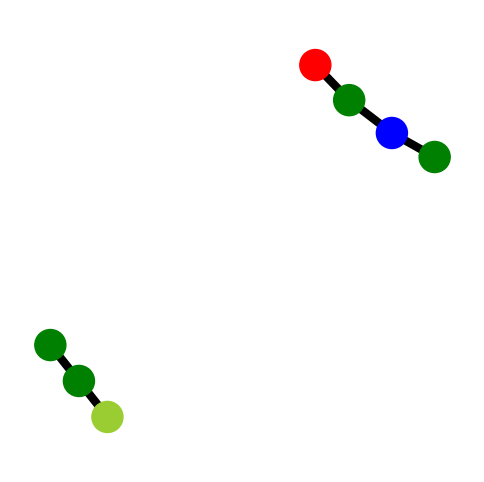

In [17]:
G = trainer[0].evaluate(threshold=0.5, show=True)

In [20]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])
    
print('Edges: ')
for e in G.edges:
    print(G.edges[e])
    


<class 'networkx.classes.graph.Graph'>
{0: {1: {'label': 1}, 17: {'label': 3}}, 1: {0: {'label': 1}}, 17: {0: {'label': 3}}, 2: {13: {'label': 1}}, 13: {2: {'label': 1}, 12: {'label': 1}}, 12: {13: {'label': 1}, 14: {'label': 2}}, 14: {12: {'label': 2}}}
[0, 1, 17, 2, 13, 12, 14]
[(0, 1), (0, 17), (2, 13), (13, 12), (12, 14)]
Nodes: 
{'label': 2}
{'label': 2}
{'label': 6}
{'label': 2}
{'label': 3}
{'label': 2}
{'label': 5}
Edges: 
{'label': 1}
{'label': 3}
{'label': 1}
{'label': 1}
{'label': 2}
--
{'label': 1}
